Notebook to study the lepton jet reconstruction efficiency w.r.t the $\Delta$R between lepton pairs. Dark matter bound state mass 100 GeV and 200 GeV, avg Lxy at .3 and 300cm. I am considering all three dark photon masses.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays

# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import hist
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_400mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10mm",
     "2Mu2E_200GeV_5GeV_200mm",
      "2Mu2E_200GeV_1p2GeV_48mm",
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        "baseNoLj_A_ee_matched_lj",
        "baseNoLj_A_mumu_matched_lj"
        #"baseNoLj_promptA",
        #"baseNoLj_displacedA",
        #"baseNoLj_veryDisplacedA",
        #"baseNoLj_lowLxyA",
        #"baseNoLj_highPtA",
        #"baseNoLj_Lxy_upto250A"
        #"2mu2e",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_ee_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_mumu_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_ee_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_mumu_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_ee_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_mumu_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_ee_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj_A_mumu_matched_lj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for 

In [4]:
ch1 = "baseNoLj"
ch2 = "baseNoLj_A_ee_matched_lj"
ch3 = "baseNoLj_A_mumu_matched_lj"

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39b6fe1850>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39b4f426d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f39b4f74220>, errorbar=<ErrorbarContainer object of 3 artists>))

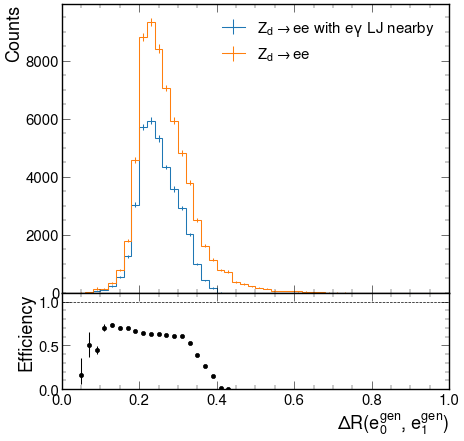

In [5]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_100GeV_5GeV_0p4mm"]["hists"]["genE_genE_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_0p4mm"]["hists"]["genE_genE_dR"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39b4ca4c70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39b4c57190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f39b4c57850>, errorbar=<ErrorbarContainer object of 3 artists>))

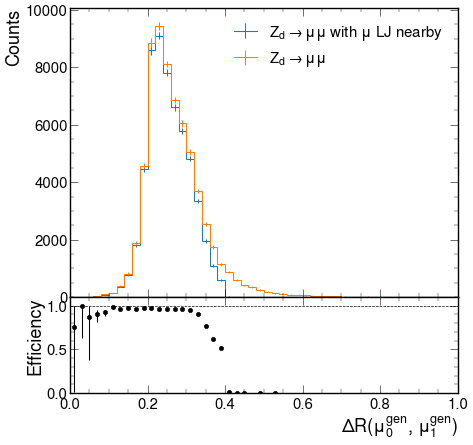

In [6]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_100GeV_5GeV_0p4mm"]["hists"]["genMu_genMu_dR"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_0p4mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39b4acadf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

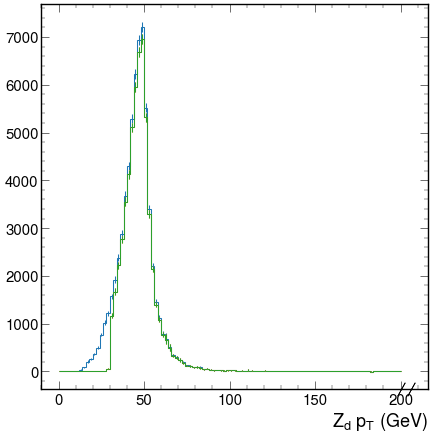

In [7]:
output["out"]["2Mu2E_100GeV_5GeV_0p4mm"]["hists"]["genAs_toMu_pt"][ch1,:].plot()
output["out"]["2Mu2E_100GeV_5GeV_0p4mm"]["hists"]["genAs_toMu_pt"][ch3,:].plot()
output["out"]["2Mu2E_100GeV_5GeV_0p4mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch1,:].plot()

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e6c524f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e6c8c4c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f35e6c52910>, errorbar=<ErrorbarContainer object of 3 artists>))

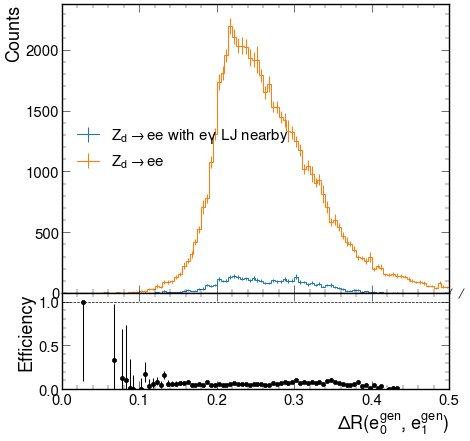

In [8]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genE_genE_dR_lowRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genE_genE_dR_lowRange"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e47dbca0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e47e21c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f35e47dbac0>, errorbar=<ErrorbarContainer object of 3 artists>))

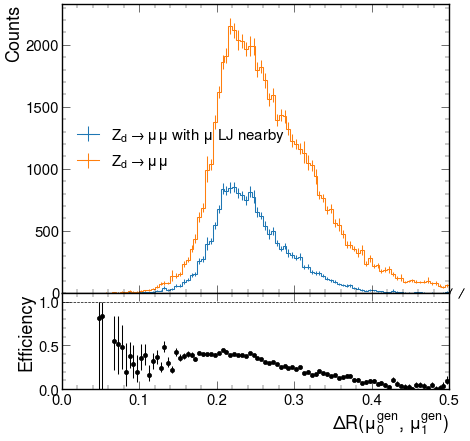

In [9]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genMu_genMu_dR_lowRange"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genMu_genMu_dR_lowRange"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e45dd670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e45b2100>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f35e45e6eb0>, errorbar=<ErrorbarContainer object of 3 artists>))

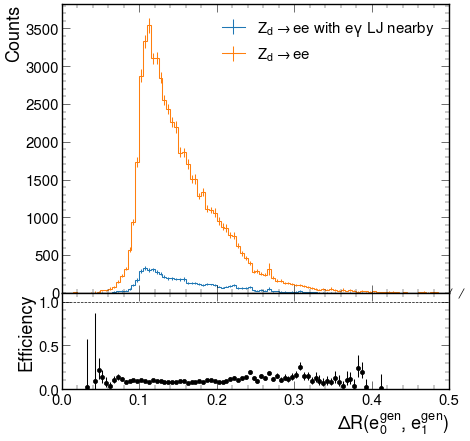

In [10]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genE_genE_dR_lowRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genE_genE_dR_lowRange"][ch1,:], 
      rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e42f4430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e42a2640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f35e4259fd0>, errorbar=<ErrorbarContainer object of 3 artists>))

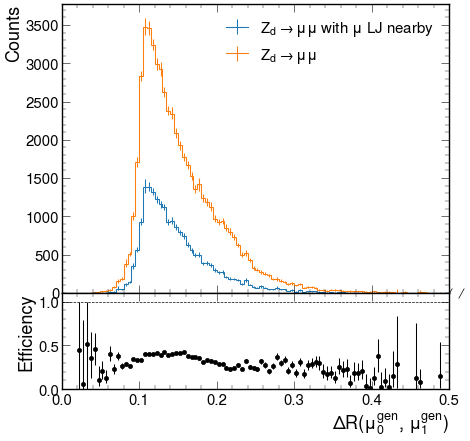

In [11]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genMu_genMu_dR_lowRange"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genMu_genMu_dR_lowRange"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35dffed2e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35dffed3d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f35dffe3e80>, errorbar=<ErrorbarContainer object of 3 artists>))

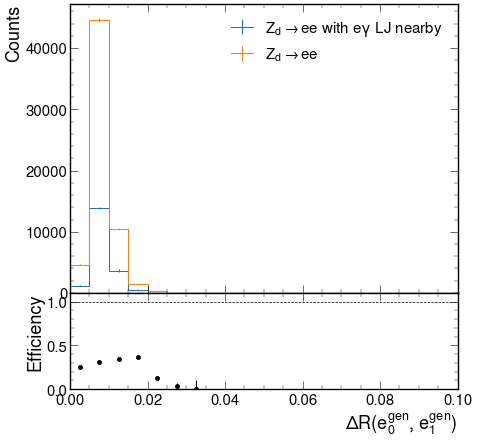

In [12]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genE_genE_dR_lowRange"][ch2,:.1j].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genE_genE_dR_lowRange"][ch1,:.1j], 
      rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35e4053e50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35dfd8b9a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f35e4053a30>, errorbar=<ErrorbarContainer object of 3 artists>))

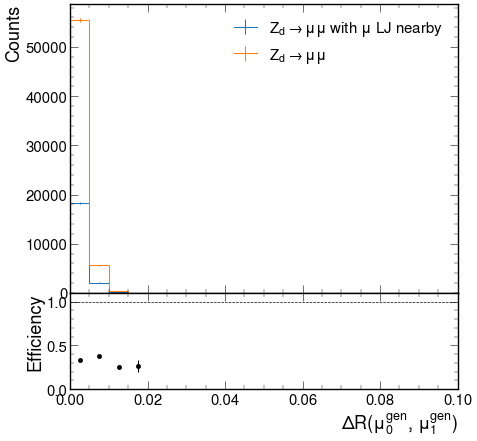

In [13]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genMu_genMu_dR_lowRange"][ch3,:.1j].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genMu_genMu_dR_lowRange"][ch1,:.1j], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35dfbbf4f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35dfb5d910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f35dfbbf250>, errorbar=<ErrorbarContainer object of 3 artists>))

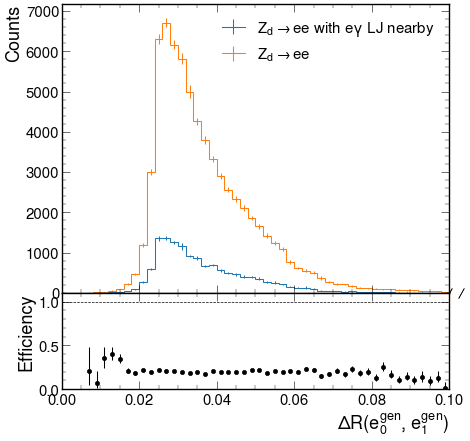

In [14]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_1p2GeV_48mm"]["hists"]["genE_genE_dR_XLowRange"][ch2,:.2j].plot_ratio(
       output["out"]["2Mu2E_200GeV_1p2GeV_48mm"]["hists"]["genE_genE_dR_XLowRange"][ch1,:.2j], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f35df75ae80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39b4b4ed00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f39b49c31c0>, errorbar=<ErrorbarContainer object of 3 artists>))

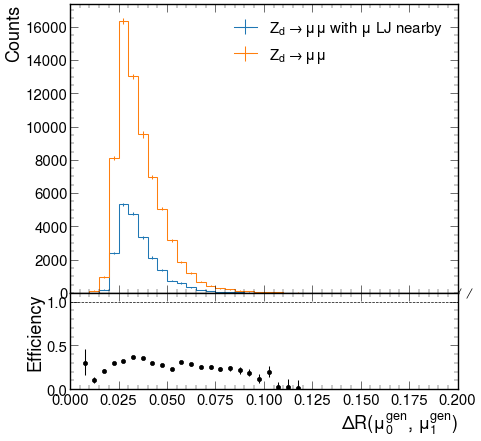

In [17]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_1p2GeV_48mm"]["hists"]["genMu_genMu_dR_lowRange"][ch3,:.2j].plot_ratio(
       output["out"]["2Mu2E_200GeV_1p2GeV_48mm"]["hists"]["genMu_genMu_dR_lowRange"][ch1,:.2j], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_100GeV_5GeV_4mm")